<a href="https://colab.research.google.com/github/NickLawrence0025/TTA-Home-Learning/blob/main/Multiple_linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

Read the csv into a dataframe:

In [149]:
honey_df = pd.read_csv('honeyproduction.csv')

One-hot encode the states so that they can be used in training the model. There may be regional factors in estimating produce value

In [150]:
honey_df = pd.get_dummies(data = honey_df, columns= ['state'])

Examine the top five rows to see the data types and columns.

In [151]:
honey_df.head()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,state_AL,state_AR,state_AZ,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Determine the learning data and the target data. Here, I will be examining which factors determine the total produce value ('prodvalue') 
I will drop the 'prodvalue' (as it will be the target), the year and the priceperlb (as it is likely too closely tied to overall value). 

In [152]:
x = honey_df.drop(['prodvalue','year','priceperlb'],axis = 'columns')
#x = honey_df[['numcol', 'totalprod', 'stocks']]
#x = honey_df[['numcol']]
y = honey_df[['prodvalue']]

Split the x and y variables into a training and test set. 80% of the data will be for training, and the trained model will be tested on the remaining 20%

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

Print the shape of each variable to confirm that this has been split correctly.

In [154]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(500, 48)
(126, 48)
(500, 1)
(126, 1)


Set the model as LinearRegression then fit it to the training data. Set a variable of predictions (y_predict)

In [155]:
mlr = LinearRegression()
model = mlr.fit(x_train,y_train)
y_predict = mlr.predict(x_test)

Create a scatter plot that compares the predicted results for the test set, and the actual results. 

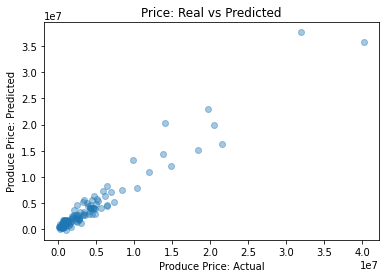

In [156]:
plt.scatter(y_test,y_predict,alpha=0.4)
plt.xlabel("Produce Price: Actual")
plt.ylabel("Produce Price: Predicted")
plt.title("Price: Real vs Predicted")
plt.show()

Here we can see that past around 0.7, the difference between actual and predicted produce price becomes larger (and harder to predict)
At this point, it's a good idea to measure the coefficiency of the each variable 

In [157]:
mlr.coef_

array([[ 1.02821936e+02, -7.48650020e+03,  5.81186060e-01,
        -1.61274088e+00,  1.43237555e+06,  7.64777102e+05,
         4.91793814e+05, -1.88677231e+07,  1.14627394e+06,
        -7.66567148e+06, -2.16014116e+06,  2.38363909e+06,
         1.44094201e+06, -3.43721702e+06,  1.90361540e+06,
         1.60972916e+06,  1.54800280e+06,  1.59923946e+06,
         2.37979503e+05,  1.34828136e+06,  9.74175821e+05,
         1.30281501e+06, -3.18797793e+06,  7.59951350e+05,
         1.50698970e+06, -1.30484591e+06,  1.42588889e+06,
        -3.64624366e+06,  1.30522759e+06,  8.74923640e+05,
         1.37743920e+06,  1.45384491e+06,  1.51317638e+06,
         1.76889608e+06,  1.35146588e+06, -4.28132418e+05,
         1.05257848e+06,  1.73613308e+06,  7.03344790e+05,
         1.60870404e+06, -2.65373528e+06,  2.34714386e+05,
         1.36207037e+06,  1.77342211e+06, -5.71877512e+05,
         2.79070587e+06,  1.51170510e+06, -3.71256396e+05]])

Hard to determine without a visual, however num_col, total_prod and stocks seem to have a stronger coefficency with prod_value. 
A number of scatter plots will give a better idea. 

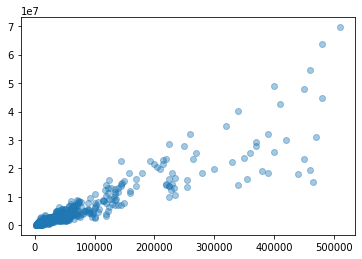

<Figure size 432x288 with 0 Axes>

In [158]:
plt.scatter(honey_df[['numcol']], honey_df[['prodvalue']], alpha=0.4)

plt.show()
plt.clf()

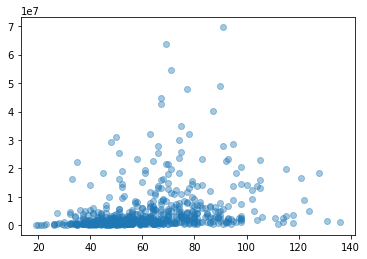

<Figure size 432x288 with 0 Axes>

In [159]:
plt.scatter(honey_df[['yieldpercol']], honey_df[['prodvalue']], alpha=0.4)

plt.show()
plt.clf()

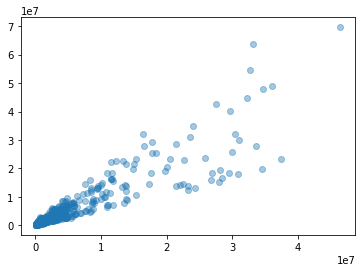

<Figure size 432x288 with 0 Axes>

In [160]:
plt.scatter(honey_df[['totalprod']], honey_df[['prodvalue']], alpha=0.4)

plt.show()
plt.clf()

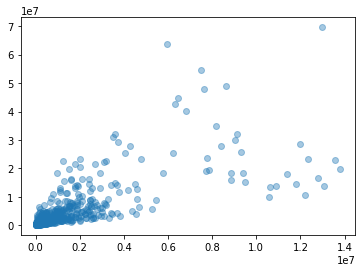

<Figure size 432x288 with 0 Axes>

In [161]:
plt.scatter(honey_df[['stocks']], honey_df[['prodvalue']], alpha=0.4)

plt.show()
plt.clf()

Total produced and number of colonies is strongly correlated with produce value. However, we can score the current model with the features currently used, and use it as base line for potential improvement. 

Train score: 
0.9114190331997539
Test score:
0.9437540384873646


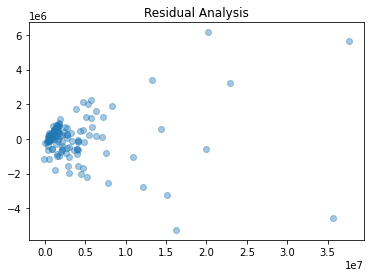

In [162]:
print("Train score: ")
print(model.score(x_train, y_train))

print("Test score:")
print(model.score(x_test, y_test))
residuals = y_predict - y_test
 
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
 
plt.show()

By looking at the residuals (the absolute differences between training and test set results) we can see that we can predict with the greatest accuracy if the values concerned are between 0.1 and 0.3. 
The insight we gain is that some feature tweaking may help, perhaps removing some of the less correlating features like yieldpercol. 


**SUMMARY**

This is a supervised learning algorithm that seeks to predict the honey produce value based on a number of comtributing factors. 

While not being a forecasting tool as such, it can determine whether the value is fair and in line with the historically determining factors of production e.g bee colony sizes, number of colonies in each state, produce per colony. 

Similar algorithms are used for processes such as predicting property prices based on multiple factors. Where property price is concerned, you should be able to price new properties accurately and in line with the current market. 
